<a href="https://colab.research.google.com/github/mg253a/data-science-probando-relaciones-con-regresion-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [639]:
#Leyendo los datos
import pandas as pd

datos = pd.read_csv('/content/precios_casas.csv')
datos.head(2)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0


In [640]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [641]:
datos = datos.drop(columns=['Id'])
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [642]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   area_primer_piso             1438 non-null   float64
 1   tiene_segundo_piso           1438 non-null   int64  
 2   area_segundo_piso            1438 non-null   float64
 3   cantidad_banos               1438 non-null   int64  
 4   capacidad_carros_garage      1438 non-null   int64  
 5   calidad_de_cocina_excelente  1438 non-null   int64  
 6   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 78.8 KB


## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [643]:
# Correlación
corr = datos.corr()

In [644]:
corr = corr['precio_de_venta']
corr

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


In [645]:
# Actividad
# Cuáles factores están más correlacionados?
# Actividad

## Relacionando variables

In [646]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

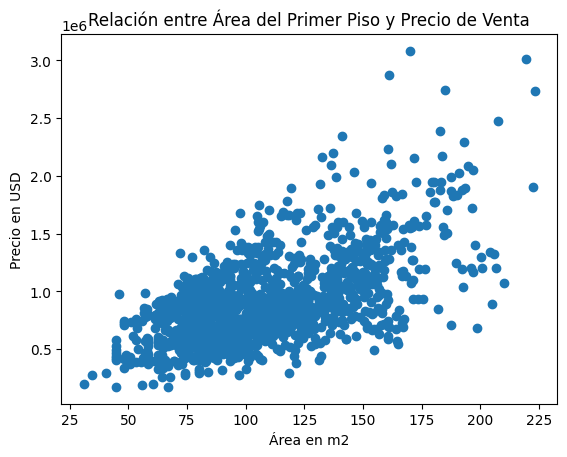

In [647]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.title('Relación entre Área del Primer Piso y Precio de Venta')
plt.xlabel('Área en m2')
plt.ylabel('Precio en USD')
plt.show()

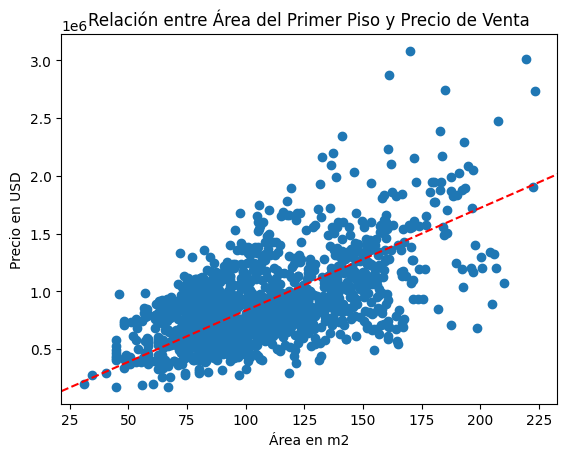

In [648]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.axline(xy1=(40,300000),xy2=(175,1500000),color='red',linestyle='--')
plt.title('Relación entre Área del Primer Piso y Precio de Venta')
plt.xlabel('Área en m2')
plt.ylabel('Precio en USD')
plt.show()

## Mejor recta

In [649]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos, x='area_primer_piso',y='precio_de_venta', trendline_color_override='red', trendline = 'ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

/tmp/ipython-input-650-3364137671.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




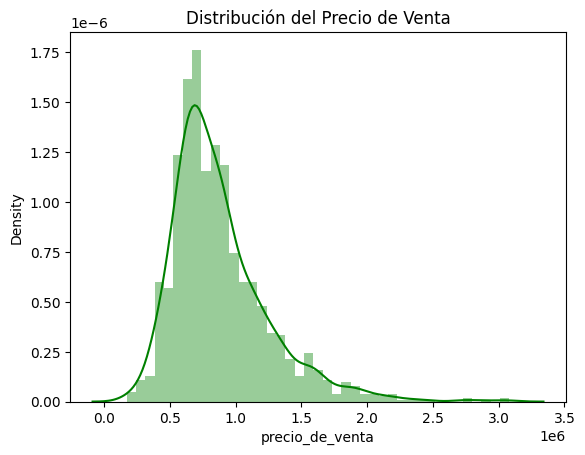

In [650]:
#Quién es nuestra variable de respuesta?
sns.distplot(datos['precio_de_venta'],kde=True, color='green')
plt.title('Distribución del Precio de Venta')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [651]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns=['precio_de_venta'])

# Garantizar la reproductivilidad de la segregación los datos, eso es random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [652]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train

In [653]:
# import ols
from statsmodels.formula.api import ols

In [654]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [655]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


In [656]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        15:47:12   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [657]:
# observando el R²
round(modelo_0.rsquared,2)

np.float64(0.38)

## Entendiendo el resíduo

In [658]:
# Quiénes son los residuos?
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


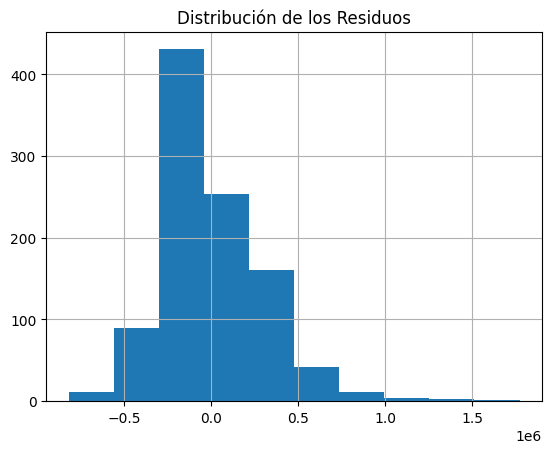

In [659]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribución de los Residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [660]:
# definiendo la 'Y' prevista
y_predict = modelo_0.predict(X_test)

In [661]:
# importando el r2_score
from sklearn.metrics import r2_score

In [662]:
# mostrando el resultado de r²
print(f'El coeficiente de determinacion R2 para el modelo con los datos de prueba es de : {round(r2_score(y_test, y_predict),2)}')

El coeficiente de determinacion R2 para el modelo con los datos de prueba es de : 0.39


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

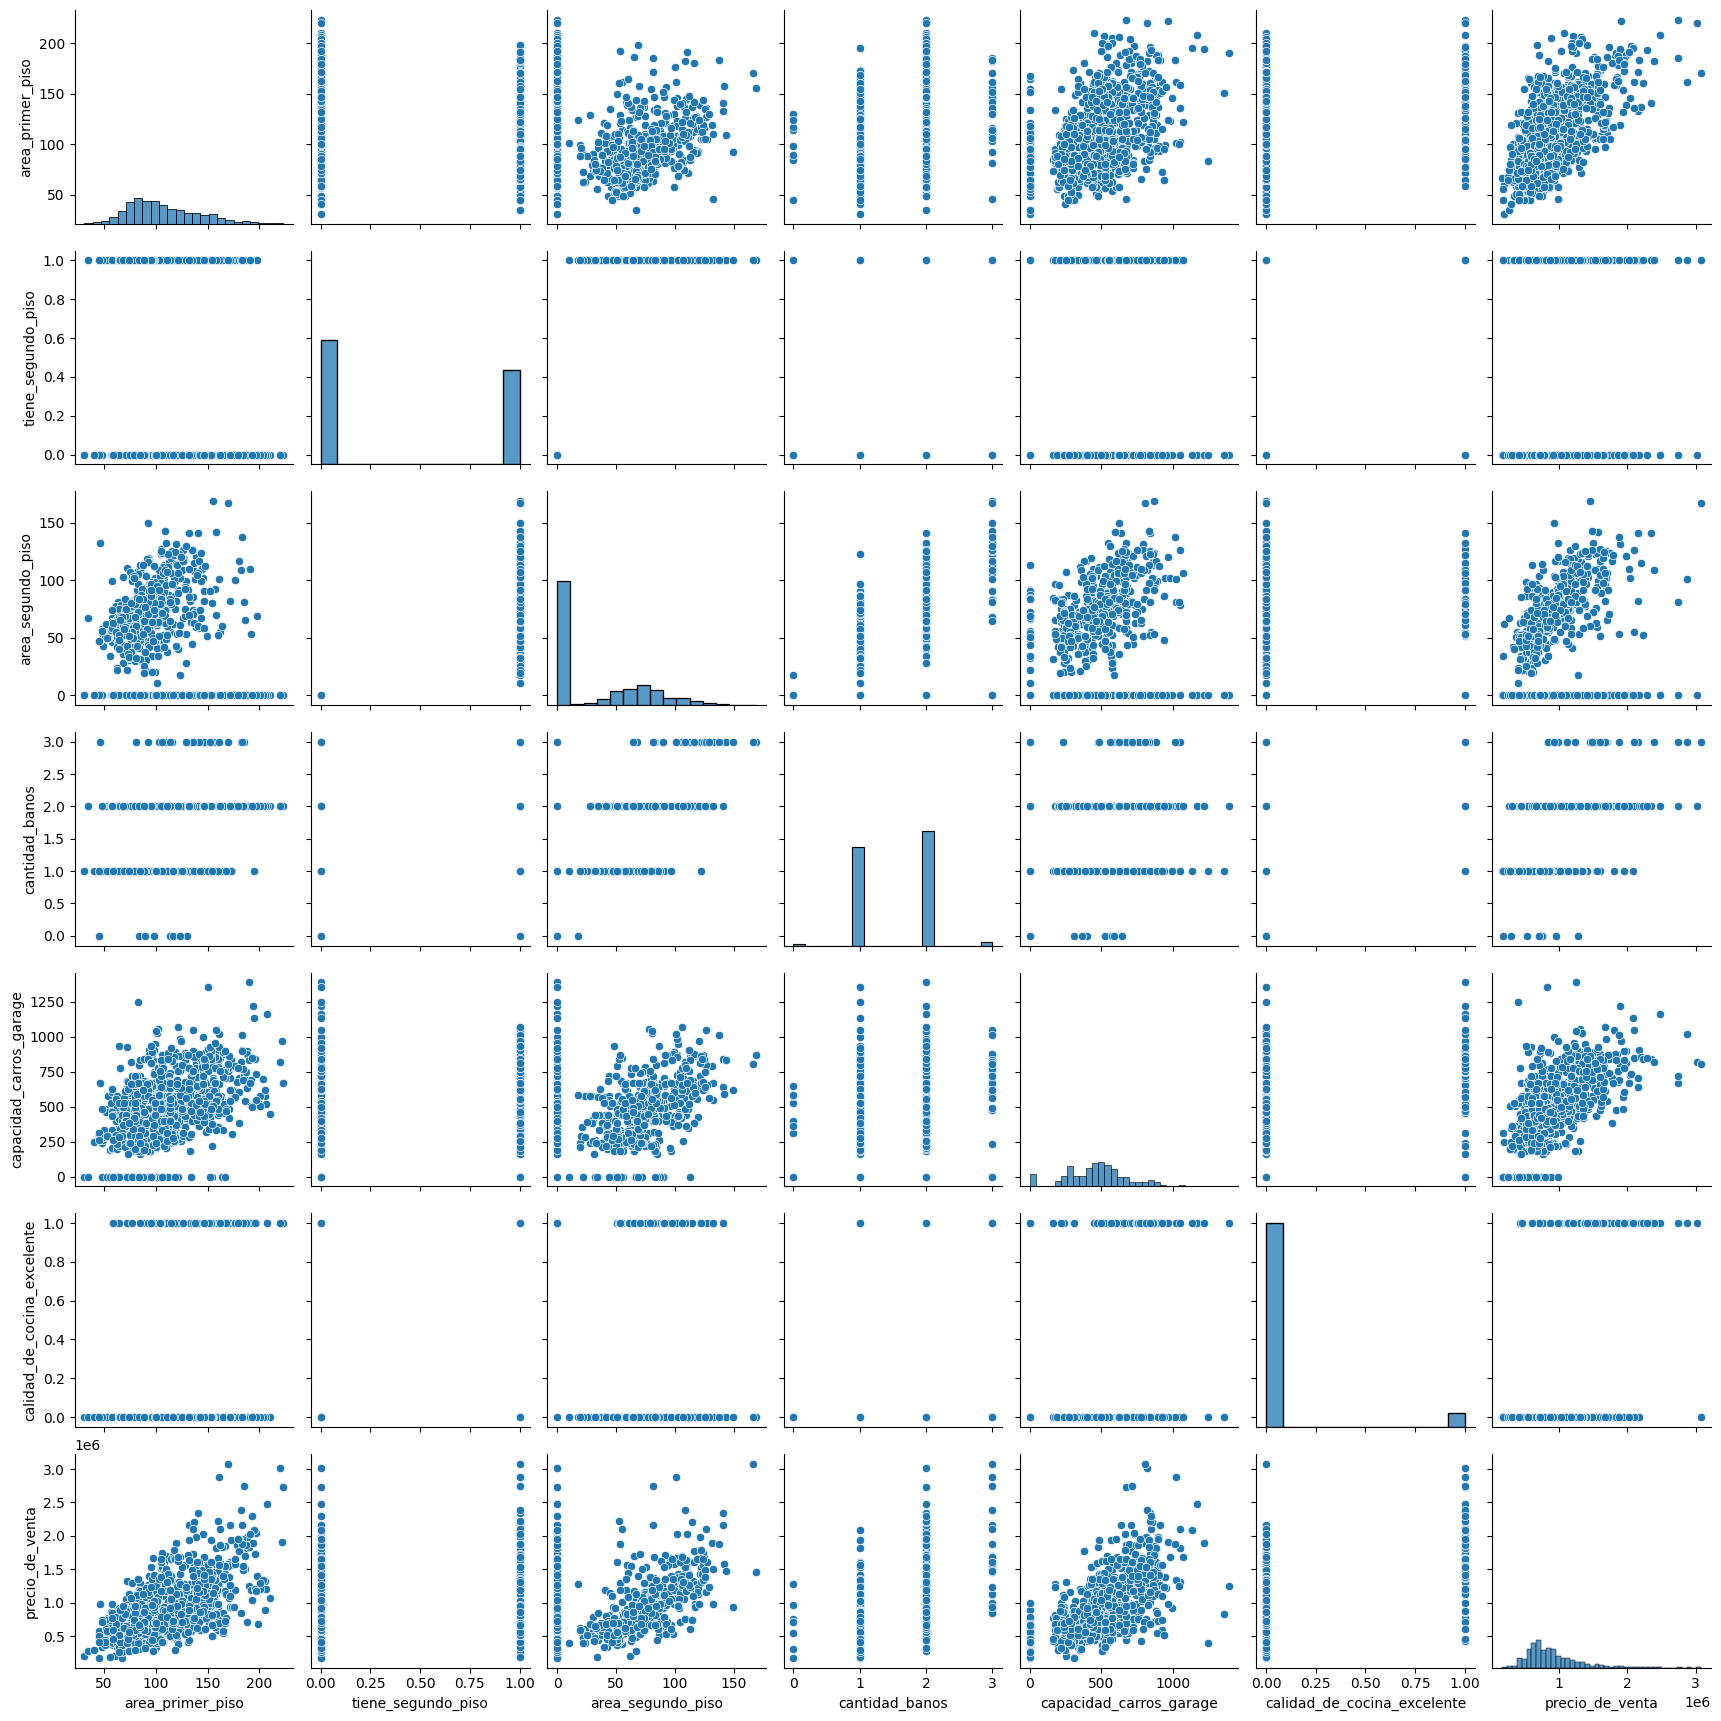

In [663]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)

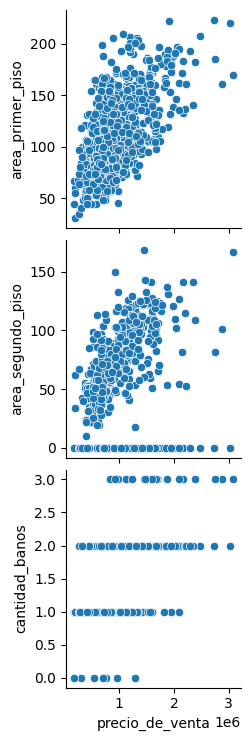

In [664]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos,y_vars=['area_primer_piso','area_segundo_piso','cantidad_banos'],x_vars='precio_de_venta')

## Añadiendo factores al modelo

In [665]:
# importando la api de statsmodels
import statsmodels.api as sm

In [666]:
# Añadiendo una constante
X_train = sm.add_constant(X_train)
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [667]:
X_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [668]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train, X_train[['const','area_primer_piso','tiene_segundo_piso',
                                    'area_segundo_piso','cantidad_banos', 'capacidad_carros_garage',
                                    'calidad_de_cocina_excelente']]).fit()

In [669]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train, X_train[['const','area_primer_piso','tiene_segundo_piso',
                                    'cantidad_banos', 'capacidad_carros_garage',
                                    'calidad_de_cocina_excelente']]).fit()

In [670]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train, X_train[['const','area_primer_piso','tiene_segundo_piso',
                                    'cantidad_banos','calidad_de_cocina_excelente']]).fit()


In [671]:
# Resumen del modelos
modelos = [modelo_0, modelo_1, modelo_2, modelo_3]

for i,j in enumerate(modelos):
  print(f'******************************************************************************\n****************** El modelo {i} tiene el siguiente resumen ********************\n******************************************************************************')
  print(j.summary(),'\n\n')

******************************************************************************
****************** El modelo 0 tiene el siguiente resumen ********************
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        15:47:23   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust               

In [672]:
for i, j in enumerate(modelos):
  print(f'El coeficiente de determinacion R2 para el modelo {i} es de : {round(j.rsquared,2)}')

El coeficiente de determinacion R2 para el modelo 0 es de : 0.38
El coeficiente de determinacion R2 para el modelo 1 es de : 0.74
El coeficiente de determinacion R2 para el modelo 2 es de : 0.71
El coeficiente de determinacion R2 para el modelo 3 es de : 0.65


## Comparando los modelos
Cuál es el modelo?


In [673]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [674]:
# Añadiendo una constante en X_test
X_test = sm.add_constant(X_test)
X_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [675]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(X_test[['const','area_primer_piso','tiene_segundo_piso',
                                       'cantidad_banos','calidad_de_cocina_excelente']])

In [676]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R2 de la base de prevision es: {modelo_3.rsquared.round(2)}')

El coeficiente R2 de la base de prevision es: 0.65


In [677]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R2 con respecto a la de entrenamiento es: {round(r2_score(y_test,prevision_3),2)}')

El coeficiente R2 con respecto a la de entrenamiento es: 0.64


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [678]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [679]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const': [1],
    'area_primer_piso': [120],
    'tiene_segundo_piso': [1],
    'cantidad_banos': [2],
    'calidad_de_cocina_excelente': [0]
})

In [680]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

,0
0,968146.29


In [681]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

,0
0,1123758.24


In [682]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [683]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv('/content/nuevas_casas.csv', sep=';')
nuevas_casas.head(2)

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1


In [684]:
nuevas_casas.drop(columns='Casa',inplace=True)

In [685]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)

In [686]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()
precio_casas = pd.DataFrame()
precio_casas['Precio de venta'] = modelo_3.predict(nuevas_casas).round(2)
precio_casas

,Precio de venta
0,1751739.07
1,1863057.99
2,1568149.47
3,2206758.02
4,1591628.64
5,1246151.31
6,1357470.23
7,1552133.97
8,963647.81
9,1639973.72


In [687]:
nuevas_casas['Precio de venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [688]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [689]:
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']
explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']
explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                  'cantidad_banos', 'calidad_de_cocina_excelente']

In [690]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas_1
vif_1['vif'] = [vif(X_train[explicativas_1],i)for i in range(len(explicativas_1))]
vif_1


,variables,vif
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [691]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

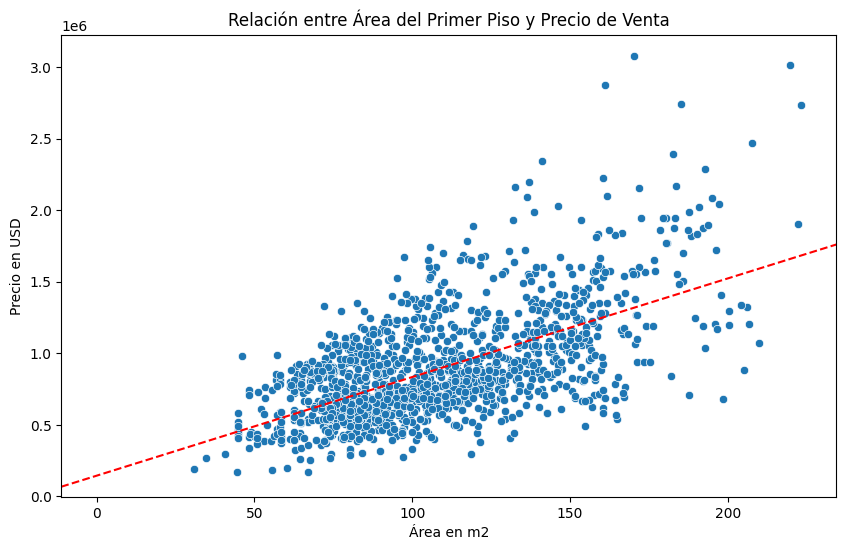

In [692]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x='area_primer_piso', y='precio_de_venta')
plt.title('Relación entre Área del Primer Piso y Precio de Venta')
plt.xlabel('Área en m2')
plt.ylabel('Precio en USD')

# Calculate the line of best fit using numpy
m, b = np.polyfit(datos['area_primer_piso'], datos['precio_de_venta'], 1)
plt.axline(xy1=(0, b), slope=m, color='red', linestyle='--')

plt.show()

In [693]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [694]:
# Define the dependent and independent variables
Y = datos['precio_de_venta']
X = datos['area_primer_piso']

# Add a constant to the independent variable for statsmodels
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the OLS model
modelo_0 = sm.OLS(Y_train, X_train).fit()

# Print the model summary
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     699.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          8.41e-121
Time:                        15:47:23   Log-Likelihood:                -16125.
No. Observations:                1150   AIC:                         3.225e+04
Df Residuals:                    1148   BIC:                         3.226e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.364e+05   2.96e+04  

In [695]:
# visualizando los parámetros
print("Parámetros del modelo:")
print(modelo_0.params)

Parámetros del modelo:
const               136408.906347
area_primer_piso      6986.385203
dtype: float64


In [696]:
# observando el R²
print("\nR² del modelo de entrenamiento:")
print(modelo_0.rsquared)


R² del modelo de entrenamiento:
0.3787308485660442


In [697]:
# Quiénes son los residuos?
print("\nResiduos del modelo:")
residuos = modelo_0.resid
print(residuos.head())


Residuos del modelo:
538     -55612.934244
174    -339036.836288
1390   -367705.499090
303      73607.722994
1128    -91456.576905
dtype: float64


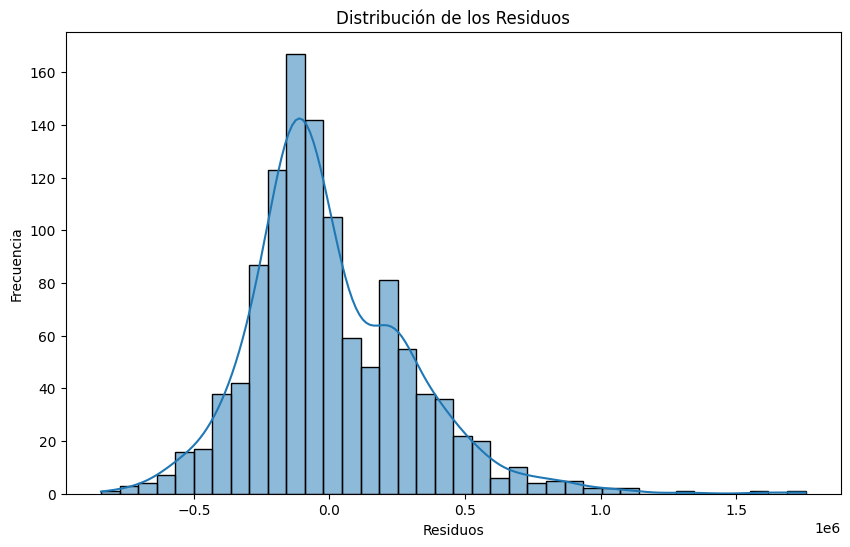

In [698]:
# Cómo están distribuidos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

In [699]:
# definiendo la 'Y' prevista
Y_pred = modelo_0.predict(X_test)

In [700]:
# importando el r2_score
from sklearn.metrics import r2_score

In [701]:
# mostrando el resultado de r²
r2_test = r2_score(Y_test, Y_pred)
print(f"R² de la previsión en el conjunto de prueba: {r2_test}")

R² de la previsión en el conjunto de prueba: 0.38492593921885443


In [702]:
# cuáles otras características podrían explicar el precio de los inmuebles?
# Let's look at the correlations again
print(corr.sort_values(ascending=False))

precio_de_venta                1.000000
capacidad_carros_garage        0.640214
area_primer_piso               0.616557
cantidad_banos                 0.563132
calidad_de_cocina_excelente    0.496223
area_segundo_piso              0.305311
tiene_segundo_piso             0.138541
Name: precio_de_venta, dtype: float64


In [703]:
#Vamos a analizar solamente y_vars='precio_de_venta'
# This section seems to be a comment or placeholder.
# We have already analyzed correlations. We can proceed to build the next model.

In [704]:
# importando la api de statsmodels
import statsmodels.api as sm

In [705]:
# Añadiendo una constante
# This is already done in the previous model. We will add it to the full feature set later.

In [706]:
# Creando el modelo de regresión (con todas las variables): saturado

# Define the dependent and independent variables with all features
Y = datos['precio_de_venta']
X = datos.drop(columns=['precio_de_venta'])

# Add a constant to the independent variables for statsmodels
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the OLS model with all features
modelo_saturado = sm.OLS(Y_train, X_train).fit()

# Print the model summary
print(modelo_saturado.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     574.9
Date:                Wed, 09 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:47:24   Log-Likelihood:                -15599.
No. Observations:                1150   AIC:                         3.121e+04
Df Residuals:                    1143   BIC:                         3.125e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [707]:
# Modelo sin el área del segundo piso

# Define the independent variables without 'area_segundo_piso'
X_model1 = datos.drop(columns=['precio_de_venta', 'area_segundo_piso'])

# Add a constant
X_model1 = sm.add_constant(X_model1)

# Split the data
X_train_model1, X_test_model1, Y_train, Y_test = train_test_split(X_model1, Y, test_size=0.2, random_state=42)

# Fit the OLS model
modelo_1 = sm.OLS(Y_train, X_train_model1).fit()

# Print the model summary
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     601.0
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          5.91e-317
Time:                        15:47:24   Log-Likelihood:                -15657.
No. Observations:                1150   AIC:                         3.133e+04
Df Residuals:                    1144   BIC:                         3.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [708]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso - corrected comment

# Define the independent variables without 'capacidad_carros_garage' and 'area_segundo_piso'
X_model2 = datos.drop(columns=['precio_de_venta', 'capacidad_carros_garage', 'area_segundo_piso'])

# Add a constant
X_model2 = sm.add_constant(X_model2)

# Split the data
X_train_model2, X_test_model2, Y_train, Y_test = train_test_split(X_model2, Y, test_size=0.2, random_state=42)

# Fit the OLS model
modelo_2 = sm.OLS(Y_train, X_train_model2).fit()

# Print the model summary
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     553.8
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          8.03e-266
Time:                        15:47:24   Log-Likelihood:                -15779.
No. Observations:                1150   AIC:                         3.157e+04
Df Residuals:                    1145   BIC:                         3.159e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [709]:
# Modelo sin la información del garage - corrected comment
# Modelo sin el área del segundo piso - corrected comment

# Define the independent variables without 'capacidad_carros_garage'
X_model3 = datos.drop(columns=['precio_de_venta', 'capacidad_carros_garage'])

# Add a constant
X_model3 = sm.add_constant(X_model3)

# Split the data
X_train_model3, X_test_model3, Y_train, Y_test = train_test_split(X_model3, Y, test_size=0.2, random_state=42)

# Fit the OLS model
modelo_3 = sm.OLS(Y_train, X_train_model3).fit()

# Print the model summary
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     544.7
Date:                Wed, 09 Jul 2025   Prob (F-statistic):          1.62e-299
Time:                        15:47:24   Log-Likelihood:                -15698.
No. Observations:                1150   AIC:                         3.141e+04
Df Residuals:                    1144   BIC:                         3.144e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [710]:
# Comparing the models

print("Comparison of Models:")
print("---------------------------------------------------------------------------------------")
print(f"{'Model':<15} | {'R-squared (Train)':<20} | {'Adjusted R-squared (Train)':<30} | {'AIC (Train)':<15} | {'BIC (Train)':<15} | {'No. of Parameters':<20}")
print("---------------------------------------------------------------------------------------")
print(f"{'Modelo Saturado':<15} | {modelo_saturado.rsquared:<20.4f} | {modelo_saturado.rsquared_adj:<30.4f} | {modelo_saturado.aic:<15.2f} | {modelo_saturado.bic:<15.2f} | {modelo_saturado.df_model + 1:<20}")
print(f"{'Modelo 1 (sin area_segundo_piso)':<15} | {modelo_1.rsquared:<20.4f} | {modelo_1.rsquared_adj:<30.4f} | {modelo_1.aic:<15.2f} | {modelo_1.bic:<15.2f} | {modelo_1.df_model + 1:<20}")
print(f"{'Modelo 2 (sin garage y area_segundo_piso)':<15} | {modelo_2.rsquared:<20.4f} | {modelo_2.rsquared_adj:<30.4f} | {modelo_2.aic:<15.2f} | {modelo_2.bic:<15.2f} | {modelo_2.df_model + 1:<20}")
print(f"{'Modelo 3 (sin garage)':<15} | {modelo_3.rsquared:<20.4f} | {modelo_3.rsquared_adj:<30.4f} | {modelo_3.aic:<15.2f} | {modelo_3.bic:<15.2f} | {modelo_3.df_model + 1:<20}")
print("---------------------------------------------------------------------------------------")

# You can also compare R-squared on the test set if you have calculated predictions for each model
# For example:
# Y_pred_saturado = modelo_saturado.predict(X_test_saturado) # Need to create X_test_saturado if not already done
# r2_test_saturado = r2_score(Y_test, Y_pred_saturado)
# print(f"R² de la previsión (Modelo Saturado): {r2_test_saturado}")

Comparison of Models:
---------------------------------------------------------------------------------------
Model           | R-squared (Train)    | Adjusted R-squared (Train)     | AIC (Train)     | BIC (Train)     | No. of Parameters   
---------------------------------------------------------------------------------------
Modelo Saturado | 0.7511               | 0.7498                         | 31211.09        | 31246.42        | 7.0                 
Modelo 1 (sin area_segundo_piso) | 0.7243               | 0.7231                         | 31326.99        | 31357.27        | 6.0                 
Modelo 2 (sin garage y area_segundo_piso) | 0.6592               | 0.6580                         | 31568.45        | 31593.69        | 5.0                 
Modelo 3 (sin garage) | 0.7042               | 0.7029                         | 31407.80        | 31438.08        | 6.0                 
---------------------------------------------------------------------------------------


In [711]:
#Nuevo inmueble
# Define the features of a new house based on the columns used in modelo_3
# The columns used in modelo_3 are: 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso', 'cantidad_banos', 'calidad_de_cocina_excelente'
# We also need to add a 'const' column with a value of 1.

nuevo_inmueble_data = {
    'const': [1],
    'area_primer_piso': [100],  # Example value
    'tiene_segundo_piso': [1], # Example value (1 for Yes, 0 for No)
    'area_segundo_piso': [80],   # Example value
    'cantidad_banos': [2],     # Example value
    'calidad_de_cocina_excelente': [1] # Example value (1 for Excellent, 0 for Not Excellent)
}

nuevo_inmueble = pd.DataFrame(nuevo_inmueble_data)

print("Features of the new house:")
print(nuevo_inmueble)

Features of the new house:
   const  area_primer_piso  tiene_segundo_piso  area_segundo_piso  \
0      1               100                   1                 80   

   cantidad_banos  calidad_de_cocina_excelente  
0               2                            1  


In [712]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
# Assuming modelo_0 is available in the environment
# Note: modelo_0 only uses 'area_primer_piso' and 'const'
nuevo_inmueble_model0 = nuevo_inmueble[['const', 'area_primer_piso']]
precio_modelo_0 = modelo_0.predict(nuevo_inmueble_model0)
print(f"Precio previsto por Modelo 0: ${precio_modelo_0[0]:,.2f}")

Precio previsto por Modelo 0: $835,047.43


In [713]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
# Assuming modelo_3 is available in the environment
precio_modelo_3 = modelo_3.predict(nuevo_inmueble)
print(f"Precio previsto por Modelo 3: ${precio_modelo_3[0]:,.2f}")

Precio previsto por Modelo 3: $1,480,648.22


In [714]:
# Leyendo varias casas?
# Assuming a CSV file named 'nuevas_casas.csv' exists with the same columns as the training data (excluding 'precio_de_venta')
try:
    nuevas_casas = pd.read_csv('/content/nuevas_casas.csv')
    print("Data for new houses loaded successfully:")
    display(nuevas_casas.head())
except FileNotFoundError:
    print("Error: 'nuevas_casas.csv' not found. Please upload the file or provide the correct path.")
    # Create a dummy DataFrame for demonstration if the file is not found
    print("Creating a dummy DataFrame for demonstration.")
    data_nuevas_casas = {
        'area_primer_piso': [120, 150, 90],
        'tiene_segundo_piso': [1, 0, 1],
        'area_segundo_piso': [100, 0, 70],
        'cantidad_banos': [2, 3, 1],
        'capacidad_carros_garage': [600, 700, 400],
        'calidad_de_cocina_excelente': [1, 0, 1]
    }
    nuevas_casas = pd.DataFrame(data_nuevas_casas)
    print("Dummy DataFrame:")
    display(nuevas_casas.head())

Data for new houses loaded successfully:


,Casa;area_primer_piso;tiene_segundo_piso;cantidad_banos;calidad_de_cocina_excelente
0,1;150;1;2;1
1,2;180;0;3;1
2,3;120;1;2;1
3,4;200;1;3;1
4,5;160;0;2;1


In [715]:
# Añadiendo una constante
# Add a constant column to the new houses DataFrame
nuevas_casas = sm.add_constant(nuevas_casas, prepend=True)
print("\nData for new houses with constant added:")
display(nuevas_casas.head())


Data for new houses with constant added:


,const,Casa;area_primer_piso;tiene_segundo_piso;cantidad_banos;calidad_de_cocina_excelente
0,1.0,1;150;1;2;1
1,1.0,2;180;0;3;1
2,1.0,3;120;1;2;1
3,1.0,4;200;1;3;1
4,1.0,5;160;0;2;1


In [716]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()

# Assuming modelo_3 is chosen for prediction. Replace with the chosen model if different.
# Make sure the columns in nuevas_casas match the columns in the model's training data X.
# Drop 'capacidad_carros_garage' if using modelo_3, as it was excluded from this model.
if 'capacidad_carros_garage' in nuevas_casas.columns and 'capacidad_carros_garage' not in modelo_3.params.index:
    nuevas_casas_for_prediction = nuevas_casas.drop(columns=['capacidad_carros_garage'])
else:
    nuevas_casas_for_prediction = nuevas_casas.copy()


precio_nuevas_casas = modelo_3.predict(nuevas_casas_for_prediction)

print("\nPredicted prices for the new houses:")
print(precio_nuevas_casas)

ValueError: shapes (10,2) and (6,) not aligned: 2 (dim 1) != 6 (dim 0)

In [ ]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Calculate VIF for each feature in modelo_3's independent variables (X_train_model3)
# Exclude the constant term if it's present, as VIF is for independent variables' relationships
X_for_vif = X_train_model3.drop(columns=['const'])

vif_data = pd.DataFrame()
vif_data["feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i)
                   for i in range(X_for_vif.shape[1])]

print("VIF for features in Modelo 3:")
print(vif_data)